# Data Science com Python <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1024px-Python-logo-notext.svg.png" width="40" height="40" align="center"/> 
## Parte 07: Funcionalidades avançadas 

### Agrupando valores
Utilizando o o comando [```DataFrame.groupby()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), podemos agrupar valores de acordo com a operação desejada. Definimos a coluna ou conjunto de colunas de referência para o agrupamento passando para o parâmetro ```by``` o nome da coluna ou uma lista de nomes de colunas. Além disso, precisamos especificar a estatística utilizada no agrupamento. No exemplo abaixo, faremos a agrupamento por tipo de imóvel, utilizando a média como estatística de agrupamento.

In [3]:
import pandas as pd

housing = pd.read_csv('https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/housing_ok.csv')
housing.head()

,bairro,endereco,quartos,tipo,preco,distancia_aeroporto,cep,banheiros,vagas,area_terreno,area_construida,ano_construcao,latitude,longitude
0,Collingwood,2/79 Oxford St,2,kitnet,855000.0,1.6,3066.0,1,1,2886.0,122.0,1830.0,-37.8042,144.9845
1,Fitzroy,52 Nicholson St,4,casa,3310000.0,1.6,3065.0,4,2,337.0,291.0,1854.0,-37.8052,144.9739
2,Parkville,152 Park Dr,2,casa,2200000.0,2.6,3052.0,2,1,190.0,172.0,1875.0,-37.7928,144.9575
3,Carlton,100 Faraday St,2,casa,1010000.0,1.8,3053.0,1,0,101.0,60.0,1880.0,-37.7989,144.9713
4,Fitzroy North,470 Brunswick St,2,casa,860000.0,3.5,3068.0,1,0,104.0,70.0,1880.0,-37.7927,144.9796


In [4]:
housing.groupby(by='tipo').mean()

,quartos,preco,distancia_aeroporto,cep,banheiros,vagas,area_terreno,area_construida,ano_construcao,latitude,longitude
tipo,,,,,,,,,,,
apartamento,2.946058,8.881973e+05,9.865145,3085.265560,1.858921,1.514523,384.651452,142.610788,2000.149378,-37.802300,144.980269
casa,3.295434,1.352434e+06,9.073993,3089.119517,1.667413,1.713071,515.550582,163.590304,1947.431065,-37.803816,144.985277
kitnet,2.128852,6.067495e+05,8.974510,3099.084034,1.170868,1.176471,830.633053,86.175378,1982.086835,-37.810230,144.992512


O resultado do comando é um novo ```DataFrame``` com o ```tipo``` definido como indice e a média de cada coluna numéria por tipo de imóvel.
As outras estatísticas disponíveis para o agrupamento:
* ```count()```: contagem de valores
* ```max()```: valor máximo
* ```min()```: valor mínimo
* ```median()```: mediana
* ```std()```: desvio padrão

Para a lista completa de estatísticas disponíveis, clique [aqui](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/).

O agrupamento pode também ser feito para um conjunto de grupos. No exemplo abaixo, temos o agrupamento por tipo e número de quartos, utilizando o valor máximo como estatística. Além disso, selecionamos somente a coluna ```preco``` como valor de interesse. O resultado é uma ```Series``` contendo, como indice, uma estrutura chamada [```MultiIndex()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html) definida como a combinação (neste exemplo) dos tipos e números de quartos e, como valor para cada combinação, temos o preço máximo associado.

In [8]:
housing.groupby(by=['tipo', 'quartos']).preco.max()

tipo         quartos
apartamento  1           345000.0
             2          1540000.0
             3          2700000.0
             4          2900000.0
             5           980000.0
casa         1          1435000.0
             2          2875000.0
             3          6250000.0
             4          5700000.0
             5          8000000.0
             6          6500000.0
             7          2600000.0
             8          2950000.0
kitnet       1           600000.0
             2          1260000.0
             3          2460000.0
             4          1650000.0
Name: preco, dtype: float64

Por se tratar de uma ```Series```, podemos representar o resultado acima de qualquer forma que dejesarmos. Abaixo, representamos os valores em um gráfico de barras utilizando a função [```Series.plot.bar()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html).

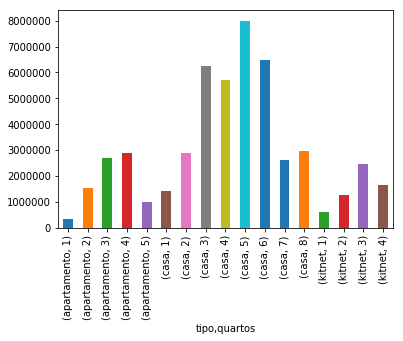

In [10]:
housing.groupby(by=['tipo', 'quartos']).preco.max().plot.bar()

Com o gráfico, concluimos que o imóvel mais caro trata-se de uma casa com 5 quartos. Por fim, podemos utilizar o comando ```Series.describe()``` para exibir todas as estatísticas descritivas para cada grupo. Abaixo temos o mesmo exemplo dos preços agrupados por tipo e número de quartos.

In [12]:
housing.groupby(by=['tipo', 'quartos']).preco.describe()

count          mean           std        min        25%  \
tipo        quartos                                                             
apartamento 1           1.0  3.450000e+05           NaN   345000.0   345000.0   
            2          57.0  7.092614e+05  2.407493e+05   380000.0   550500.0   
            3         139.0  8.819399e+05  3.236793e+05   430000.0   697000.0   
            4          42.0  1.168286e+06  4.698303e+05   600000.0   882250.0   
            5           2.0  8.125000e+05  2.368808e+05   645000.0   728750.0   
casa        1           8.0  8.517750e+05  3.317692e+05   260000.0   739925.0   
            2         343.0  9.879258e+05  3.506039e+05   365000.0   758750.0   
            3        1065.0  1.167121e+06  5.302197e+05   305000.0   796000.0   
            4         643.0  1.648079e+06  7.766668e+05   131000.0  1100000.0   
            5         156.0  2.135564e+06  1.001402e+06   605000.0  1488750.0   
            6          14.0  2.205857e+06  1.474685e+06   725000.0  1436250.0   
            7           3.0  1.701667e+06  7.794282e+05  1205000.0  1252500.0   
            8           2.0  1.915500e+06  1.463004e+06   881000.0  1398250.0   
kitnet      1          41.0  3.768049e+05  8.659495e+04   185000.0   325000.0   
            2         231.0  5.871496e+05  1.721690e+05   266000.0   470500.0   
            3          83.0  7.605542e+05  2.945745e+05   400000.0   552500.0   
            4           2.0  1.201500e+06  6.342748e+05   753000.0   977250.0   

                           50%        75%        max  
tipo        quartos                                   
apartamento 1         345000.0   345000.0   345000.0  
            2         678000.0   800000.0  1540000.0  
            3         825000.0   970000.0  2700000.0  
            4        1102500.0  1311250.0  2900000.0  
            5         812500.0   896250.0   980000.0  
casa        1         885500.0   956875.0  1435000.0  
            2         910000.0  1178500.0  2875000.0  
            3        1060000.0  1425000.0  6250000.0  
            4        1500000.0  2000500.0  5700000.0  
            5        1917500.0  2600000.0  8000000.0  
            6        1783000.0  2381250.0  6500000.0  
            7        1300000.0  1950000.0  2600000.0  
            8        1915500.0  2432750.0  2950000.0  
kitnet      1         370000.0   426500.0   600000.0  
            2         580000.0   660000.0  1260000.0  
            3         725000.0   877500.0  2460000.0  
            4        1201500.0  1425750.0  1650000.0

### Operações com texto

Uma ```Series``` do tipo ```object``` possue funcionalidades especiais de texto que possibilitam a extração de informação específicas. Acessando o atributo [```Series.str```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html), temos a nossa disposição as funcionalidades da classe [```str```](https://docs.python.org/pt-br/3/library/stdtypes.html#str) do python, incluindo a possibilidade de lidar com texto na forma de lista de caracteres.

No arquivo ```NationalNames.csv```, temos uma lista de nomes de bebês mais utilizados nos Estados Unidos, especificando o ano, sexo e frequência. 

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/NationalNames.csv')
df.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


Utilizaremos esse exemplo para listar somente os nomes que iniciam com a letra "R". Para tanto, utilizaremos o comportamento de lista de uma variável ```str```. Para acessar uma posição no texto utilizamos a notação ```str[posição]```.

In [18]:
df[df.Name.str[0] == 'R'].head()

,Id,Name,Year,Gender,Count
29,30,Rose,1880,F,700
51,52,Rosa,1880,F,507
91,92,Rebecca,1880,F,236
92,93,Ruth,1880,F,234
108,109,Rachel,1880,F,166


Podemos, ainda, agrupar dados utilizando o comando ```DataFrame.groupby()``` baseando-se em elementos do texto. Por exemplo, para somar a frequência presente na coluna ```Count``` de acordo com a primeira letra do nome, utilizamos o comando abaixo.

In [19]:
df.groupby(df.Name.str[0]).Count.sum()

Name
A    27308805
B    16198757
C    24779742
D    23801401
E    16248524
F     5057044
G    10448713
H     7948419
I     3154699
J    43578244
K    16396504
L    18205788
M    31968148
N     7434205
O     1942209
P     9062678
Q      243155
R    23237528
S    20758307
T    14054925
U      138212
V     4635528
W     8202492
X      202914
Y      785463
Z     1343022
Name: Count, dtype: int64

Para listar os nomes contendo somente três letras, utilizamos o comando ```Series.str.len()```.

In [20]:
df[df.Name.str.len() == 3].head()

,Id,Name,Year,Gender,Count
6,7,Ida,1880,F,1472
32,33,Ada,1880,F,652
40,41,Eva,1880,F,614
56,57,May,1880,F,462
70,71,Mae,1880,F,344


Podemos, também, filtrar dados baseado em pedaços de textos. Por exemplo, faremos um filtro para os nomes contendo a letra 'x'. Para tanto, utilizamos o contando [Series.str.contains()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html).

In [8]:
df[df.Name.str.contains('x')].head()

,Id,Name,Year,Gender,Count
195,196,Roxie,1880,F,62
436,437,Dixie,1880,F,15
623,624,Roxanna,1880,F,9
933,934,Texas,1880,F,5
1014,1015,Alexander,1880,M,211


### Operações com datas
Assim como em operações com texto, temos a possibilidade de trabalhar com operações de datas em um ```DataFrame``` através da utilização do tipo [```DateTime```](https://numpy.org/doc/stable/reference/arrays.datetime.html) do pacote [```numpy```](https://numpy.org/). Para exemplficar a utilização de operações de data, utilizaremos o exemplo contigo no arquivo ```drugs.csv```. Nesse exemplo, temos um histórico de vendas de medicamentos em uma farmácia. 

In [36]:
df = pd.read_csv('dados/drugs.csv')
df.head()

,Date,Antinflam,Analg,Anxio,Hypnotics,Obst_airway,Antihis
0,1/2/2014,0.0,3.4,7.0,0.0,0.0,2.0
1,1/3/2014,8.0,4.4,16.0,0.0,20.0,4.0
2,1/4/2014,2.0,6.5,10.0,0.0,9.0,1.0
3,1/5/2014,4.0,7.0,8.0,0.0,3.0,0.0
4,1/6/2014,5.0,4.5,16.0,2.0,6.0,2.0


No exemplo, temos o histório de vendas de seis medicamentos, com a coluna ```Date``` informando a data da referente a venda. Utilizando o comando ```DataFrame.info()```, observamos esta coluna foi identificado como do tipo ```object``` (texto).

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 7 columns):
Date           2106 non-null object
Antinflam      2106 non-null float64
Analg          2106 non-null float64
Anxio          2106 non-null float64
Hypnotics      2106 non-null float64
Obst_airway    2106 non-null float64
Antihis        2106 non-null float64
dtypes: float64(6), object(1)
memory usage: 115.2+ KB


Para aproveitar o uso de operações de data, precisamos transformar o tipo dessa coluna de ```object``` para ```datetime```. Para tanto, utilizamos a função [```pandas.to_datetime()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html), que recebe como parâmetro uma ```Series``` ou um ```DataFrame```, retornando o mesmo objeto agora no formato ```datetime```. 

In [38]:
pd.to_datetime(df.Date)

0      2014-01-02
1      2014-01-03
2      2014-01-04
3      2014-01-05
4      2014-01-06
5      2014-01-07
6      2014-01-08
7      2014-01-09
8      2014-01-10
9      2014-01-11
10     2014-01-12
11     2014-01-13
12     2014-01-14
13     2014-01-15
14     2014-01-16
15     2014-01-17
16     2014-01-18
17     2014-01-19
18     2014-01-20
19     2014-01-21
20     2014-01-22
21     2014-01-23
22     2014-01-24
23     2014-01-25
24     2014-01-26
25     2014-01-27
26     2014-01-28
27     2014-01-29
28     2014-01-30
29     2014-01-31
          ...    
2076   2019-09-09
2077   2019-09-10
2078   2019-09-11
2079   2019-09-12
2080   2019-09-13
2081   2019-09-14
2082   2019-09-15
2083   2019-09-16
2084   2019-09-17
2085   2019-09-18
2086   2019-09-19
2087   2019-09-20
2088   2019-09-21
2089   2019-09-22
2090   2019-09-23
2091   2019-09-24
2092   2019-09-25
2093   2019-09-26
2094   2019-09-27
2095   2019-09-28
2096   2019-09-29
2097   2019-09-30
2098   2019-10-01
2099   2019-10-02
2100   201

Para efetivar a transformação basta substituirmos a coluna original ```Date``` pela ```Series```resultante da função aplicada anteriormente.

In [40]:
df.Date = pd.to_datetime(df.Date)

Executando o comando ```DataFrame.info()```, verificamos que a transformação foi bem sucedida.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 7 columns):
Date           2106 non-null datetime64[ns]
Antinflam      2106 non-null float64
Analg          2106 non-null float64
Anxio          2106 non-null float64
Hypnotics      2106 non-null float64
Obst_airway    2106 non-null float64
Antihis        2106 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 115.2 KB


Para acessar as propriedades de data basta acessarmos o atributo [```Series.dt```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html). Por exemplo, para filtrar somente as vendas de 2015, basta acessarmos o atributo [```Series.dt.year```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html) e utilizar essa informação para aplicar o filtro.

In [43]:
df[df.Date.dt.year == 2015]

,Date,Antinflam,Analg,Anxio,Hypnotics,Obst_airway,Antihis
364,2015-01-01,0.00,0.0,0.0,0.0,0.00,0.00
365,2015-01-02,6.00,4.9,13.0,0.0,6.25,2.00
366,2015-01-03,9.00,6.0,11.0,3.0,0.00,4.00
367,2015-01-04,4.68,3.5,4.0,0.0,2.00,1.00
368,2015-01-05,2.34,1.0,14.0,0.0,16.00,3.00
369,2015-01-06,3.00,7.3,13.0,0.0,3.00,0.00
370,2015-01-07,0.00,0.0,0.0,0.0,0.00,0.00
371,2015-01-08,2.00,1.2,13.0,1.0,1.00,2.00
372,2015-01-09,3.00,9.4,33.0,2.0,7.00,2.00
373,2015-01-10,6.00,7.0,14.0,3.0,1.00,1.00


Outras opções de atributos de data:
* ```dt.year```
* ```dt.month```
* ```dt.day```
* ```dt.hour```
* ```dt.minute```
* ```dt.second```
* ```dt.microsecond```
* ```dt.nanosecond```
* ```dt.week``` | ```dt.weekofyear``` (semana do ano)
* ```dt.dayofweek``` | ```dt.weekday``` (Dia da semana com Segunda=0, Domingo=6)
* ```dt.dayofyear``` (dia do ano)
* ```dt.quarter``` (trimestre)
* ```dt.is_month_start``` (indica se o dia é o primeiro do mês)
* ```dt.is_month_end``` (indica se o dia é o último do mês)
* ```dt.is_quarter_start``` (indica se o dia é o primeiro do trimestre)
* ```dt.is_quarter_end``` (indica se o dia é o último do trimestre)
* ```dt.is_year_start``` (indica se o dia é o primeiro do ano)
* ```dt.is_year_end``` (indica se o dia é o último do ano)
* ```dt.is_leap_year``` (indica se a data pertence a um ano bisexto)
* ```dt.daysinmonth``` | ```dt.days_in_month``` (número de dias no mês)

Os atributos de data permitem que façamos operações interessantes como, por exemplo, calcular a média mensal de vendas para todos os anos utilizando o comando ```DataFrame.groupby()```.

In [47]:
df.groupby(df.Date.dt.month).mean()

,Antinflam,Analg,Anxio,Hypnotics,Obst_airway,Antihis
Date,,,,,,
1,5.022336,4.636329,10.988919,0.790090,6.835980,1.617568
2,4.999527,4.679024,9.024803,0.563116,6.896943,1.703314
3,4.912097,3.993844,8.265591,0.623656,6.290323,3.184624
4,5.117944,3.711944,7.852222,0.477778,5.771528,4.703889
5,4.846183,3.715806,7.482796,0.607527,5.006944,5.002957
6,4.714778,3.753944,7.913889,0.588889,4.350000,4.436889
7,5.207921,3.483333,8.298925,0.478495,2.956989,3.358763
8,5.428333,3.477151,9.086022,0.612903,3.102151,2.689785
9,5.004889,3.374167,9.240556,0.522222,4.402315,2.573333


Utilizando a função gráfica ```DataFrame.plot.bar()```, temos um gráfico que mostrar de forma clara os resultados obtidos com a operação de agrupamento.

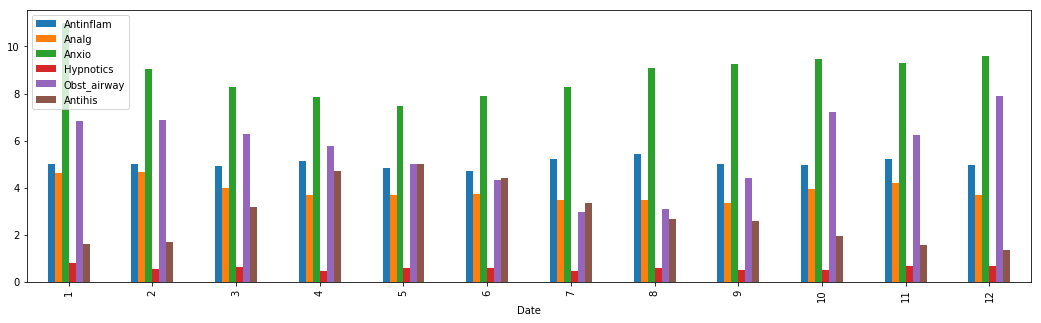

In [50]:
df.groupby(df.Date.dt.month).mean().plot.bar(figsize=(18,5))

__Outro exemplo__: agrupando por dia da semana.

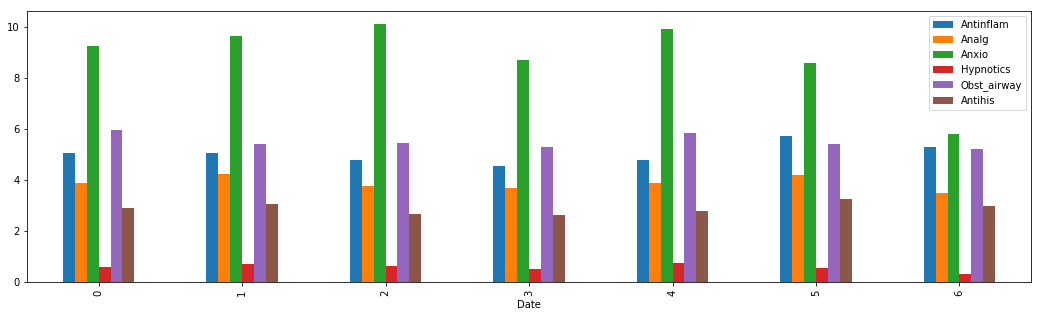

In [51]:
df.groupby(df.Date.dt.weekday).mean().plot.bar(figsize=(18,5))

### Aplicando funções em uma ```Series```
Utilizamos o comando [```Series.apply()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) para aplicar uma função específica em uma coluna de um ```DataFrame```. Utilizaremos as informações contidas no arquivo ```housing_ok.csv``` para exemplicar o uso de cada funcionalidade. 
Definiremos uma função que recebe a ```distancia_aeroporto``` e retorna o texto 'longe', caso a distância seja maior que 3.5 km e 'perto', caso contrário.

In [3]:
def perto_ou_longe(x):
    if x > 3.5:
        return 'longe'
    else:
        return 'perto'

housing.distancia_aeroporto.apply(perto_ou_longe)

0       perto
1       perto
2       perto
3       perto
4       perto
5       longe
6       perto
7       longe
8       perto
9       perto
10      perto
11      perto
12      longe
13      perto
14      perto
15      longe
16      longe
17      longe
18      perto
19      perto
20      perto
21      perto
22      longe
23      longe
24      longe
25      perto
26      longe
27      longe
28      perto
29      longe
        ...  
2802    longe
2803    longe
2804    longe
2805    longe
2806    perto
2807    longe
2808    longe
2809    longe
2810    longe
2811    longe
2812    longe
2813    longe
2814    longe
2815    longe
2816    longe
2817    longe
2818    longe
2819    longe
2820    longe
2821    longe
2822    longe
2823    longe
2824    longe
2825    longe
2826    longe
2827    longe
2828    longe
2829    longe
2830    longe
2831    longe
Name: distancia_aeroporto, Length: 2832, dtype: object

Criaremos uma nova coluna no ```DataFrame``` chamada ```perto_ou_longe``` para guardar as informações geradas.

In [4]:
housing['perto_ou_longe'] = housing.distancia_aeroporto.apply(perto_ou_longe)
housing.head()

,bairro,endereco,quartos,tipo,preco,distancia_aeroporto,cep,banheiros,vagas,area_terreno,area_construida,ano_construcao,latitude,longitude,perto_ou_longe
0,Collingwood,2/79 Oxford St,2,kitnet,855000.0,1.6,3066.0,1,1,2886.0,122.0,1830.0,-37.8042,144.9845,perto
1,Fitzroy,52 Nicholson St,4,casa,3310000.0,1.6,3065.0,4,2,337.0,291.0,1854.0,-37.8052,144.9739,perto
2,Parkville,152 Park Dr,2,casa,2200000.0,2.6,3052.0,2,1,190.0,172.0,1875.0,-37.7928,144.9575,perto
3,Carlton,100 Faraday St,2,casa,1010000.0,1.8,3053.0,1,0,101.0,60.0,1880.0,-37.7989,144.9713,perto
4,Fitzroy North,470 Brunswick St,2,casa,860000.0,3.5,3068.0,1,0,104.0,70.0,1880.0,-37.7927,144.9796,perto


### Criando uma nova coluna como resultado de operações envolvendo outras colunas
Criaremos uma nova coluna contendo a razão entre a ```area_construida``` e a ```area_terreno```. Para tanto, utilizaremos o comando [```DataFrame.eval()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.eval.html). O comando ```eval()``` recebe como parâmetro a expressão matemática no formato de texto. Para consolidar o resultado gerado pelo comando, passamos o parâmetro ```inplace=True```.

In [5]:
housing.eval('razao_area = area_construida / area_terreno', inplace=True)
housing.head()

,bairro,endereco,quartos,tipo,preco,distancia_aeroporto,cep,banheiros,vagas,area_terreno,area_construida,ano_construcao,latitude,longitude,perto_ou_longe,razao_area
0,Collingwood,2/79 Oxford St,2,kitnet,855000.0,1.6,3066.0,1,1,2886.0,122.0,1830.0,-37.8042,144.9845,perto,0.042273
1,Fitzroy,52 Nicholson St,4,casa,3310000.0,1.6,3065.0,4,2,337.0,291.0,1854.0,-37.8052,144.9739,perto,0.863501
2,Parkville,152 Park Dr,2,casa,2200000.0,2.6,3052.0,2,1,190.0,172.0,1875.0,-37.7928,144.9575,perto,0.905263
3,Carlton,100 Faraday St,2,casa,1010000.0,1.8,3053.0,1,0,101.0,60.0,1880.0,-37.7989,144.9713,perto,0.594059
4,Fitzroy North,470 Brunswick St,2,casa,860000.0,3.5,3068.0,1,0,104.0,70.0,1880.0,-37.7927,144.9796,perto,0.673077


### Pivoteamento
O pivoteamento de um ```DataFrame``` pode ser feito quando existem pelo menos duas colunas categóricas com pares de valores que não se repetem e uma ou mais colunas colunas numéricas ou catogóricas quaisquer.

Para efetuar o pivoteamento, utilizamos o comando ```DataFrame.pivot()```, definindo o parâmetro ```index``` com o nome da coluna que será representada como indice do ```DataFrame```, o parâmetro```columns``` com o nome da coluna cujos valores se tornarão colunas no pivoteamento e, o parâmetro ```values``` com o nome da coluna contendo os valores que serão pivoteados. Para exemplificar a aplicação do comando, os dados contidos no arquivo [```exemplo_pivot.csv```]('https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/exemplo_pivot.csv'). 

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/exemplo_pivot.csv')
df

,nome,disciplina,nota_final,freq
0,Ronaldo,A,10,1.00
1,Hugo,A,9,0.90
2,Victor,A,10,0.95
3,João,A,8,0.90
4,Gabriel,A,7,0.80
5,Ronaldo,B,9,0.85
6,Hugo,B,8,0.80
7,Victor,B,8,0.75
8,João,B,10,0.90
9,Gabriel,B,10,0.90


Nesse exemplo, temos a informação do nome, disciplina, nota final e frequência de alunos. Observe que as duas colunas categóricas (```nome``` e ```disciplina```) possuem valores que se repetem, formando combinações de grupos associados às colunas ```nota_final``` e ```freq```. Essa situação é perfeita para a aplicação do pivoteamento. Abaixo, faremos o pivoteamento das notas finais, utilizando o nome do aluno como indice e as disciplinas como coluna.

In [14]:
df.pivot(index='nome', columns='disciplina', values='nota_final')

disciplina,A,B,C
nome,,,
Gabriel,7,10,9
Hugo,9,8,9
João,8,10,8
Ronaldo,10,9,9
Victor,10,8,9


Para executar o pivoteamento para as frequências, definimos o valor do parâmetro ```values='freq'```.

In [15]:
df.pivot(index='nome', columns='disciplina', values='freq')

disciplina,A,B,C
nome,,,
Gabriel,0.80,0.90,0.90
Hugo,0.90,0.80,1.00
João,0.90,0.90,0.80
Ronaldo,1.00,0.85,1.00
Victor,0.95,0.75,0.75


### Transposição
A operação de transposição é bem conhecida em manipulação de matrizes. O processo, simplesmente, troca as linhas de uma matriz pelas suas colunas. Esse procedimento se aplica também a um ```DataFrame```, onde a operação troca o indice pelas colunas. Utilizando o exemplo anterior do pivoteamento, considere que a estrutura faria mais sentido de maneira transposta, ou seja, disciplinas como indice e nomes dos alunos como colunas. Poderiamos, simplesmente inverter a definição dos parâmetro ```index``` e ```columns```, ou, de forma mais rápida, utilizar o comando [```DataFrame.transpose()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html).

In [16]:
df.pivot(index='nome', columns='disciplina', values='freq').transpose()

nome,Gabriel,Hugo,João,Ronaldo,Victor
disciplina,,,,,
A,0.8,0.9,0.9,1.00,0.95
B,0.9,0.8,0.9,0.85,0.75
C,0.9,1.0,0.8,1.00,0.75
